In [15]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

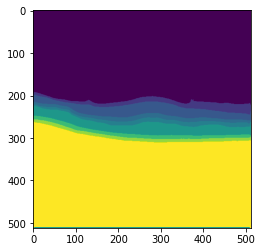

In [16]:
imfile = "/home/nonari/Documentos/test_results/resnet34_cp_sa/seg_0_40.png"
im = cv.imread(imfile, cv.IMREAD_GRAYSCALE)
plt.imshow(im)
plt.show()

In [17]:
def rearrange_mask(mask):
    sparse_labels = np.unique(mask)
    for idx, l in enumerate(sparse_labels):
        mask[mask == l] = idx + 1


In [18]:
rearrange_mask(im)

In [19]:
im[im != 1] = 0


In [20]:
stats = cv.connectedComponentsWithStats(im, connectivity=8)
vols = stats[2][1:,1]
obj_idx = np.argmin(vols) + 1
res = stats[1]
res[res != obj_idx] = 0
res = res.astype(np.uint8)

In [21]:
conts, hier = cv.findContours(res, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
filled_gaps = np.zeros(im.shape)
cv.drawContours(filled_gaps, conts, -1, 1, thickness=cv.FILLED)


array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
def fill_gaps(im, layer):
    mask = im.copy()
    mask[mask != layer] = 0
    stats = cv.connectedComponentsWithStats(im, connectivity=8)
    vols = stats[2][1:,1]
    obj_idx = np.argmin(vols) + 1
    res = stats[1]
    res[res != obj_idx] = 0
    res = res.astype(np.uint8)
    conts, hier = cv.findContours(res, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
    filled_gaps = np.zeros(im.shape)
    cv.drawContours(filled_gaps, conts, -1, 1, thickness=cv.FILLED)
    im[filled_gaps == 1] = layer